In [1]:
from google.colab import files
files.upload()

Saving archive (5).zip to archive (5) (1).zip


In [4]:
!unzip "archive (5) (1).zip" -d /content/eye_dataset


Streaming output truncated to the last 5000 lines.
  inflating: /content/eye_dataset/TestSet_json/TestSet_json/4419.json  
  inflating: /content/eye_dataset/TestSet_json/TestSet_json/44194.json  
  inflating: /content/eye_dataset/TestSet_json/TestSet_json/44195.json  
  inflating: /content/eye_dataset/TestSet_json/TestSet_json/44208.json  
  inflating: /content/eye_dataset/TestSet_json/TestSet_json/4424.json  
  inflating: /content/eye_dataset/TestSet_json/TestSet_json/44241.json  
  inflating: /content/eye_dataset/TestSet_json/TestSet_json/44246.json  
  inflating: /content/eye_dataset/TestSet_json/TestSet_json/4425.json  
  inflating: /content/eye_dataset/TestSet_json/TestSet_json/44271.json  
  inflating: /content/eye_dataset/TestSet_json/TestSet_json/44286.json  
  inflating: /content/eye_dataset/TestSet_json/TestSet_json/44294.json  
  inflating: /content/eye_dataset/TestSet_json/TestSet_json/4430.json  
  inflating: /content/eye_dataset/TestSet_json/TestSet_json/4431.json  
  inf

In [5]:
!ls /content/eye_dataset


ImprovementSet	     TestSet	   TrainingSet
pretrainedModel.pth  TestSet_json  TrainingSet_json


In [6]:
!ls /content/eye_dataset/TrainingSet


TrainingSet


In [8]:
!ls /content/eye_dataset/TrainingSet/TrainingSet


Closed	Opened


In [10]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img


In [11]:
train_path = '/content/eye_dataset/TrainingSet/TrainingSet'


In [12]:
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values between 0 and 1
    validation_split=0.2  # 20% data for validation
)


In [13]:
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(24, 24),  # resize images to 24x24
    color_mode='grayscale',  # convert to grayscale
    batch_size=32,
    class_mode='binary',  # since it's open/closed
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    train_path,
    target_size=(24, 24),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)


Found 1364 images belonging to 2 classes.
Found 340 images belonging to 2 classes.


In [14]:
print("Classes:", train_generator.class_indices)


Classes: {'Closed': 0, 'Opened': 1}


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [16]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(24, 24, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten for Dense Layers
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # helps prevent overfitting

# Output Layer
model.add(Dense(1, activation='sigmoid'))  # binary classification


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [18]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 0.5095 - loss: 0.6992 - val_accuracy: 0.5969 - val_loss: 0.6725
Epoch 2/10
 1/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5312 - loss: 0.6800

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5312 - loss: 0.6800 - val_accuracy: 0.7594 - val_loss: 0.6679
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.7571 - loss: 0.6245 - val_accuracy: 0.8406 - val_loss: 0.4309
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7812 - loss: 0.4706 - val_accuracy: 0.8313 - val_loss: 0.4323
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.8384 - loss: 0.3992 - val_accuracy: 0.8750 - val_loss: 0.3221
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9688 - loss: 0.2622 - val_accuracy: 0.8781 - val_loss: 0.3224
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9006 - loss: 0.2859 - val_accuracy: 0.8687 - val_loss: 0.3284
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9062 - loss: 0.2849 - val_accuracy: 0.8844 - val_loss: 0.3133
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9021 - loss: 0.2621 - val_accuracy: 0.8813 - val_loss: 0.

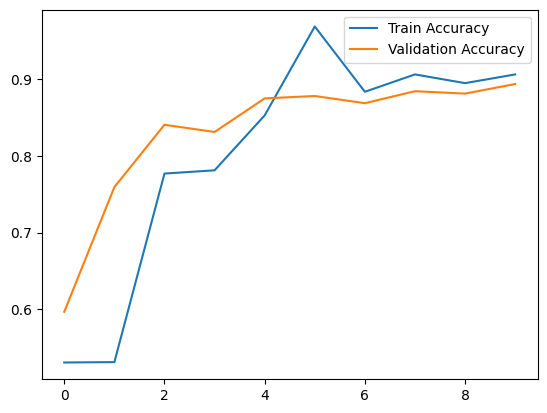

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [32]:
from google.colab import files

uploaded = files.upload()  # this opens a file picker


Saving 4971.jpg to 4971.jpg


In [34]:
img_path = list(uploaded.keys())[0]  # gets the uploaded image filename
print("Testing image:", img_path)


Testing image: 4971.jpg


In [35]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and resize the image to match model input
img = image.load_img(img_path, target_size=(24, 24), color_mode='grayscale')

# Convert to array and normalize
img_array = image.img_to_array(img) / 255.0

# Add batch dimension
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
prediction = model.predict(img_array)

# Output result
if prediction[0][0] > 0.5:
    print("Eye is Open")
else:
    print("Eye is Closed")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
Eye is Open
